<a href="https://colab.research.google.com/github/lponcec94/PolyWorks/blob/main/semana_3/Ejercicio_semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# pip install k-means-constrained

     |████████████████████████████████| 557 kB 10.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.4 MB 98 kB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
  Using cached numpy-1.21.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Created wheel for k-means-constrained: filename=k_means_constrained-0.6.0-cp37-cp37m-linux_x86_64.whl size=1410468 sha256=8d77bf717134fd777b071b1c9740c587363cb819ec06bcc57062b5dfbeb1f0e0
  Stored in directory: /root/.cache/pip/wheels/c1/71/49/3c504743f39dc4f94af42a1f4fa1ea8a9709c35101402bcd4f
Successfully built k-means-constrained
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfu

In [3]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from k_means_constrained import KMeansConstrained

from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/lponcec94/PolyWorks/main/semana_3/data/employee_satisfaction_train.csv')

In [32]:
df.head()

,ID,Date,Temperature,Humidity,Humex,CO2,Bright
0,0,2017-08-31 23:30:00,22.7,56.0,25.7,534.0,1.0
1,1,2017-09-01 00:30:00,22.8,55.0,25.7,506.0,1.0
2,2,2017-09-01 01:30:00,22.9,55.0,25.9,577.0,1.0
3,3,2017-09-01 02:30:00,23.0,55.0,26.1,630.0,1.0
4,4,2017-09-01 03:30:00,23.0,55.0,26.1,643.0,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8000 non-null   int64  
 1   Date         8000 non-null   object 
 2   Temperature  8000 non-null   float64
 3   Humidity     8000 non-null   float64
 4   Humex        8000 non-null   float64
 5   CO2          8000 non-null   float64
 6   Bright       8000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 437.6+ KB


In [34]:
df.isnull().sum()

ID             0
Date           0
Temperature    0
Humidity       0
Humex          0
CO2            0
Bright         0
dtype: int64

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
df['Date'].dtype

dtype('<M8[ns]')

In [37]:
df.head()

,ID,Date,Temperature,Humidity,Humex,CO2,Bright
0,0,2017-08-31 23:30:00,22.7,56.0,25.7,534.0,1.0
1,1,2017-09-01 00:30:00,22.8,55.0,25.7,506.0,1.0
2,2,2017-09-01 01:30:00,22.9,55.0,25.9,577.0,1.0
3,3,2017-09-01 02:30:00,23.0,55.0,26.1,630.0,1.0
4,4,2017-09-01 03:30:00,23.0,55.0,26.1,643.0,1.0


In [38]:
df['Date'].dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
7995    2018
7996    2018
7997    2018
7998    2018
7999    2018
Name: Date, Length: 8000, dtype: int64

In [39]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [40]:
standar_scaler = StandardScaler()
df_scale = standar_scaler.fit_transform(df.drop(columns=['ID', 'Date']))

In [41]:
df_scale = pd.DataFrame(df_scale, columns=df.columns[2:])
df_scale.head()

,Temperature,Humidity,Humex,CO2,Bright,Month,Day
0,-0.151174,2.695116,1.175429,-0.258951,-0.528247,0.027314,1.801576
1,-0.089558,2.573765,1.175429,-0.397135,-0.528247,0.260763,-1.654547
2,-0.027943,2.573765,1.252984,-0.046741,-0.528247,0.260763,-1.654547
3,0.033673,2.573765,1.330538,0.214821,-0.528247,0.260763,-1.654547
4,0.033673,2.573765,1.330538,0.278978,-0.528247,0.260763,-1.654547


In [69]:
df_scale.shape

(8000, 7)

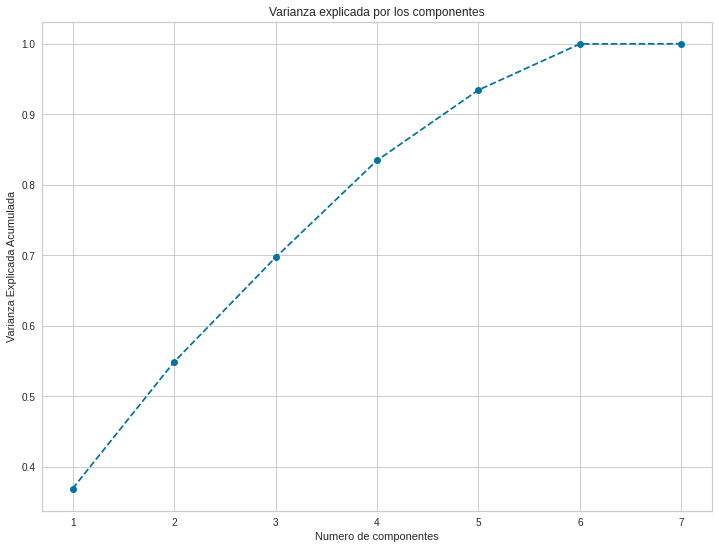

In [70]:
pca = PCA()
pca.fit(df_scale)

plt.figure(figsize=(12, 9))

plt.plot(range(1, df_scale.shape[1]+1), pca.explained_variance_ratio_ .cumsum(), marker='o', linestyle='--')
plt.title("Varianza explicada por los componentes")
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza Explicada Acumulada");

In [43]:
pca = PCA(n_components=4)
pca.fit(df_scale)

standard_pca = pca.transform(df_scale)
df_standard_pca = pd.DataFrame(standard_pca, 
                               columns=['C1', 'C2', 'C3', 'C4'])
df_standard_pca.head()

,C1,C2,C3,C4
0,1.197699,-2.255221,-0.254338,2.320957
1,0.886511,-1.969636,-2.418718,-0.195846
2,1.097913,-1.801905,-2.436496,-0.203271
3,1.275319,-1.681737,-2.451529,-0.214230
4,1.299871,-1.647386,-2.453512,-0.211678


In [44]:
K = range(2, 10)

distortions = []
silhouette_coef = []

for k in K:
  model = KMeans(n_clusters=k).fit(df_standard_pca)
  distortions.append(model.inertia_)
  score = silhouette_score(df_standard_pca, model.labels_)
  silhouette_coef.append(score)


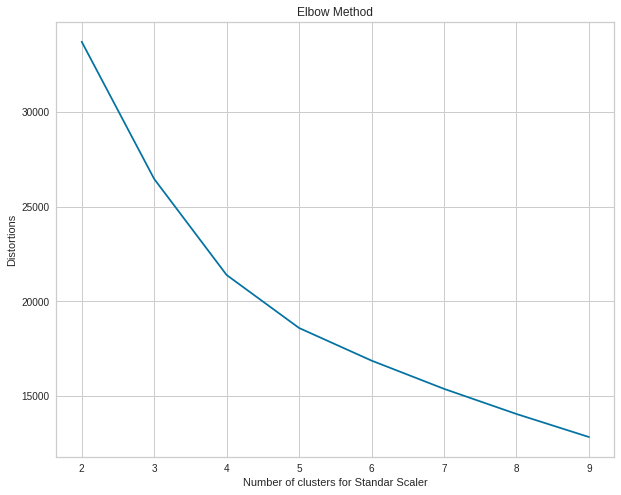

In [45]:
plt.figure(figsize=(10, 8))
plt.plot(K, distortions, 'x-')
plt.xlabel('Number of clusters for Standar Scaler')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()

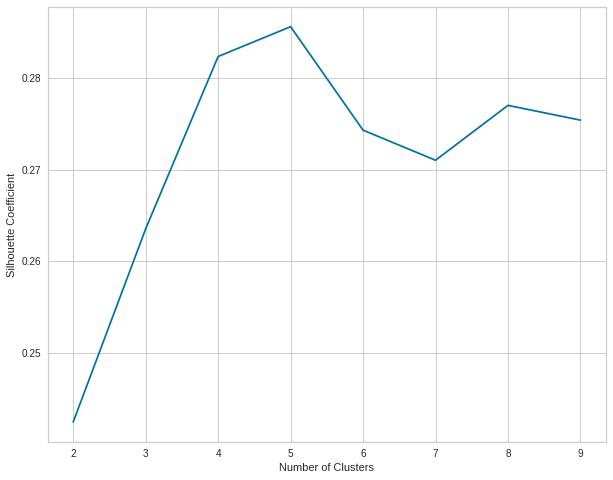

In [46]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), silhouette_coef)
plt.xticks(range(2, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [71]:
df.shape

(8000, 9)

In [72]:
8000/5

1600.0

In [73]:
model = KMeansConstrained(n_clusters=5, size_min=4,
                          size_max=1600, random_state=42)
predict = model.fit_predict(df_standard_pca)

In [74]:
df_2 = df.copy()

In [75]:
df_2['kmeans_constrained'] = predict

In [76]:
df_2.head()

,ID,Date,Temperature,Humidity,Humex,CO2,Bright,Month,Day,kmeans_constrained
0,0,2017-08-31 23:30:00,22.7,56.0,25.7,534.0,1.0,8,31,2
1,1,2017-09-01 00:30:00,22.8,55.0,25.7,506.0,1.0,9,1,2
2,2,2017-09-01 01:30:00,22.9,55.0,25.9,577.0,1.0,9,1,2
3,3,2017-09-01 02:30:00,23.0,55.0,26.1,630.0,1.0,9,1,2
4,4,2017-09-01 03:30:00,23.0,55.0,26.1,643.0,1.0,9,1,2


In [77]:
df_2.groupby('kmeans_constrained').agg({'Month':'count'})

,Month
kmeans_constrained,
0,1600
1,1600
2,1600
3,1600
4,1600


In [80]:
df_2.pivot_table(values=['Temperature', 'CO2'], index='kmeans_constrained'
              # , columns='Month'
               , aggfunc=['mean', 'median']).sort_values(('mean', 'CO2'))

mean             median            
                           CO2 Temperature    CO2 Temperature
kmeans_constrained                                           
3                   456.618750   20.427313  464.0        20.4
2                   486.003125   23.295188  453.5        23.4
1                   520.791875   23.407375  487.0        23.3
4                   572.598125   23.330188  497.5        23.2
0                   896.343125   24.266687  880.5        24.2



---



---



### Overfitting

In [49]:
### Overfitting 

pca = PCA(n_components=7)
pca.fit(df_scale)

standard_pca = pca.transform(df_scale)
df_standard_pca = pd.DataFrame(standard_pca, 
                               columns=[f'C{i}' for i in range(1, 8)])
df_standard_pca.head()

,C1,C2,C3,C4,C5,C6,C7
0,1.197699,-2.255221,-0.254338,2.320957,-0.153352,-0.512795,-0.046430
1,0.886511,-1.969636,-2.418718,-0.195846,0.751541,-0.368556,-0.040514
2,1.097913,-1.801905,-2.436496,-0.203271,0.696406,-0.605166,-0.021335
3,1.275319,-1.681737,-2.451529,-0.214230,0.644271,-0.775110,-0.002176
4,1.299871,-1.647386,-2.453512,-0.211678,0.642105,-0.823258,-0.002162


In [50]:
K = range(2, 15)

distortions = []
silhouette_coef = []

for k in K:
  model = KMeans(n_clusters=k).fit(df_standard_pca)
  distortions.append(model.inertia_)
  score = silhouette_score(df_standard_pca, model.labels_)
  silhouette_coef.append(score)

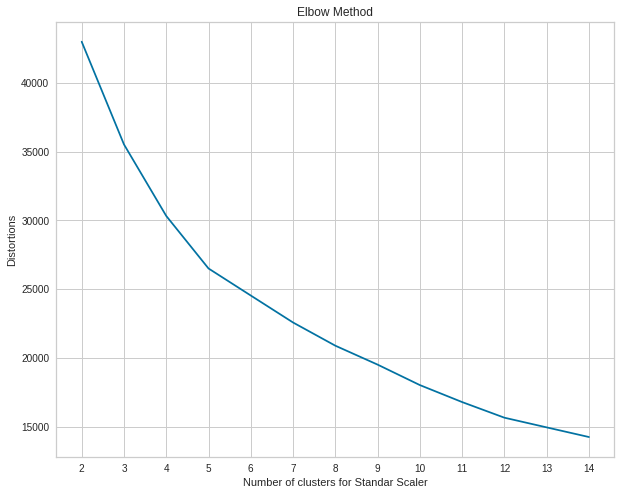

In [53]:
plt.figure(figsize=(10, 8))
plt.plot(K, distortions, 'x-')
plt.xticks(range(2, 15))
plt.xlabel('Number of clusters for Standar Scaler')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()

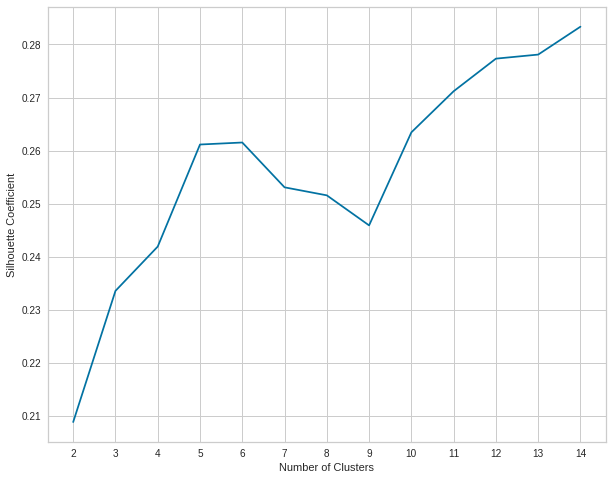

In [52]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 15), silhouette_coef)
plt.xticks(range(2, 15))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [83]:
model = KMeans(n_clusters=14, random_state=6)
predict = model.fit_predict(df_standard_pca)

In [84]:
df_2['n_cluster_14'] = predict

In [85]:
df_2.head()

,ID,Date,Temperature,Humidity,Humex,CO2,Bright,Month,Day,kmeans_constrained,n_cluster_14
0,0,2017-08-31 23:30:00,22.7,56.0,25.7,534.0,1.0,8,31,2,10
1,1,2017-09-01 00:30:00,22.8,55.0,25.7,506.0,1.0,9,1,2,4
2,2,2017-09-01 01:30:00,22.9,55.0,25.9,577.0,1.0,9,1,2,4
3,3,2017-09-01 02:30:00,23.0,55.0,26.1,630.0,1.0,9,1,2,4
4,4,2017-09-01 03:30:00,23.0,55.0,26.1,643.0,1.0,9,1,2,4


In [86]:
df_2.pivot_table(values=['Temperature', 'CO2'], index='kmeans_constrained'
              # , columns='Month'
               , aggfunc=['mean', 'median']).sort_values(('mean', 'Temperature'))

mean             median            
                           CO2 Temperature    CO2 Temperature
kmeans_constrained                                           
3                   456.618750   20.427313  464.0        20.4
2                   486.003125   23.295188  453.5        23.4
4                   572.598125   23.330188  497.5        23.2
1                   520.791875   23.407375  487.0        23.3
0                   896.343125   24.266687  880.5        24.2

In [88]:
df_2.pivot_table(values=['Temperature', 'CO2'], index='n_cluster_14'
              # , columns='Month'
               , aggfunc=['mean', 'median']).sort_values(('mean', 'Temperature'))

mean             median            
                     CO2 Temperature    CO2 Temperature
n_cluster_14                                           
9             423.910891   20.065545  397.0        20.2
12            476.555921   20.105592  471.0        20.3
2             483.402802   20.844308  483.0        20.9
11            460.784854   21.569880  446.0        21.7
4             481.929638   22.727719  454.0        22.8
1             506.292683   23.206151  479.0        23.1
13            552.260054   23.317694  500.0        23.2
5             903.867886   23.835569  878.0        23.9
6             766.627778   23.853333  785.5        23.9
8             925.783646   23.923850  903.0        23.9
7             528.168975   23.998199  495.0        24.0
10            473.089779   24.039365  447.0        24.0
0             894.113772   24.501497  846.5        24.5
3             801.584450   24.953619  770.0        24.9